# Regression model

## Project:  Predicting computer performance 

##### In this project,I'm going to predict the computer performance with some features given such as cycle time,minimum main memory,maximum main memory etc..

###### First I am going to import all the necessary libraries required for this project

In [437]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

##### Here I am loading my data through url from [UCI](https://archive.ics.uci.edu/ml/index.php) and display my top 5 rows of data using head()

In [438]:
com=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data",delimiter=',')
com.head()

,adviser,32/60,125,256,6000,256.1,16,128,198,199
0,amdahl,470v/7,29,8000,32000,32,8,32,269,253
1,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
2,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
3,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
4,amdahl,470v/b,26,8000,32000,64,8,32,318,290


##### Now I will remove incorrect column names and add the correct one.So the correct columns are:
##### 1.vendor name
##### 2.Model Name
##### 3.MYCT
##### 4.MMIN
##### 5.MMAX
##### 6.CACH
##### 7.CHMIN
##### 8.CHMAX
##### 9.PRP
##### 10.ERP

In [439]:
cols1=com.columns=['vendor name','Model Name','MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP','ERP']

##### data with corrected columns:

In [440]:
com.head()

,vendor name,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,amdahl,470v/7,29,8000,32000,32,8,32,269,253
1,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
2,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
3,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
4,amdahl,470v/b,26,8000,32000,64,8,32,318,290


##### Check whether there are any null values in my data.If i find any null values we can use DataFrame.dropna() to remove the rows with null values

In [441]:
for col in cols:
    print(com[col].isna().value_counts())

False    208
Name: vendor name, dtype: int64
False    208
Name: Model Name, dtype: int64
False    208
Name: MYCT, dtype: int64
False    208
Name: MMIN, dtype: int64
False    208
Name: MMAX, dtype: int64
False    208
Name: CACH, dtype: int64
False    208
Name: CHMIN, dtype: int64
False    208
Name: CHMAX, dtype: int64
False    208
Name: PRP, dtype: int64
False    208
Name: ERP, dtype: int64


##### So,here there are no null values

In [442]:
com.shape

(208, 10)

In [404]:
com=com.drop([9,  13,  14,  16,  17,  19,  20,  21,  22,  23,  25,  46,  49,
             50,  52,  56,  57,  58,  59,  60,  61,  65,  66,  67,  71,  72,
             75,  79,  82,  83,  84,  85,  96,  97,  98,  99, 101, 102, 103,
            104, 105, 106, 107, 110, 121, 122, 123, 124, 130, 136, 156, 157,
            158, 159, 160, 161, 162, 163, 169, 170, 172, 173, 199, 200, 201,
            202, 203, 205,206, 207],axis=0)

In [443]:
com.shape

(208, 10)

In [444]:
for col in cols1:
    print(com[col].isnull().value_counts())

False    208
Name: vendor name, dtype: int64
False    208
Name: Model Name, dtype: int64
False    208
Name: MYCT, dtype: int64
False    208
Name: MMIN, dtype: int64
False    208
Name: MMAX, dtype: int64
False    208
Name: CACH, dtype: int64
False    208
Name: CHMIN, dtype: int64
False    208
Name: CHMAX, dtype: int64
False    208
Name: PRP, dtype: int64
False    208
Name: ERP, dtype: int64


##### Visualize data to check all the relations in the data

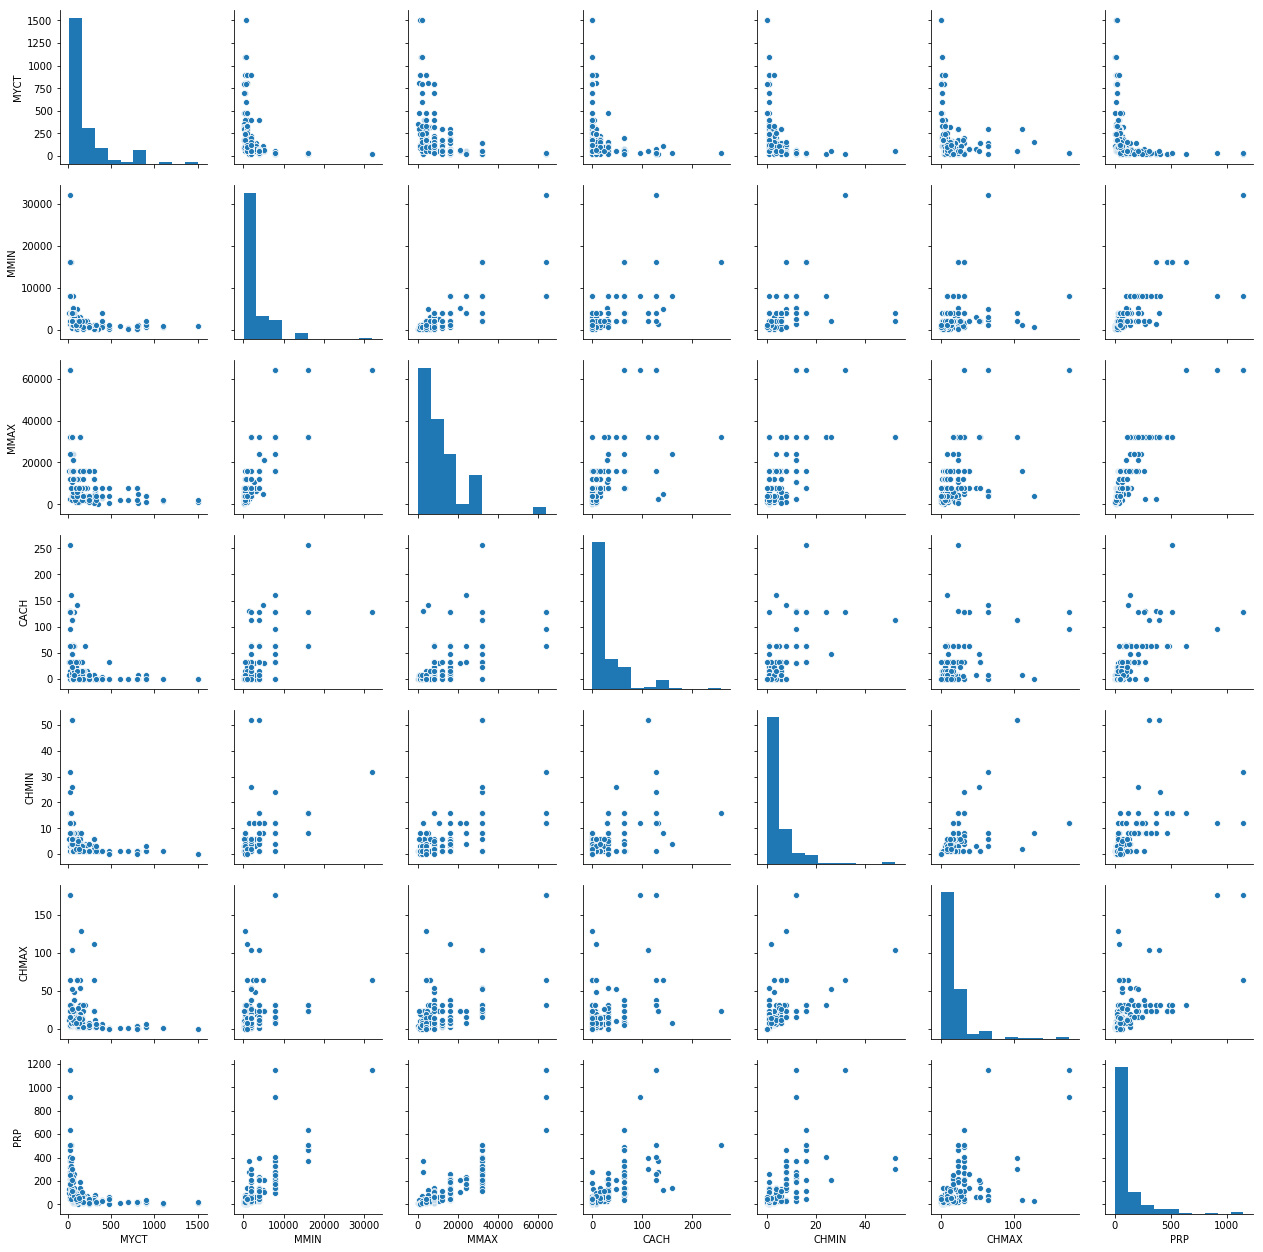

In [23]:
sns.pairplot(com)

##### Check all the model performances and choose the best fit 

##### So,I am going for random forest regressor

##### Choose features for training and labels for testing

In [478]:
X=com[['MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX']]
y=com['PRP']

##### split train and test using train_test_split()

In [479]:
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.215,random_state=0)

In [480]:
print(train_X.shape)
print(test_X.shape)

(163, 6)
(45, 6)


##### Construct the Random Forest Regressor(tune the parameters to improve performance of the model)

In [481]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,random_state=50,min_samples_leaf=2,max_features='sqrt',min_impurity_decrease=0.02,oob_score=True,n_jobs=-1)
rf.fit(train_X,train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.02, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=True, random_state=50, verbose=0, warm_start=False)

##### predict target values  

In [460]:
pred=rf.predict(test_X)

##### calculating absolute mean errors in prediction

In [462]:
errors=abs(pred-test_y)
np.mean(errors)

22.347154686889

##### score of the predictive model

In [463]:
rf.score(test_X,test_y)

0.9121474054605396

##### The score of my prediction model is 0.91

##### Let's calculate accuracy

In [482]:
mape=100*(errors/test_y)
accuracy=100-np.mean(mape)

In [483]:
accuracy

72.506772921658

##### So accuracy is 72.5